<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
# DRUG-TARGET INTERACTION MACHINE LEARNING MODEL
# Author: Saeed, Rifat

In [1]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving chembl_CancerData.csv to chembl_CancerData.csv


In [2]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['chembl_CancerData.csv']))

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        1080 non-null   object 
 1   Name                             1080 non-null   object 
 2   Synonyms                         1076 non-null   object 
 3   Type                             1002 non-null   object 
 4   Max Phase                        1002 non-null   float64
 5   Molecular Weight                 965 non-null    float64
 6   Targets                          838 non-null    float64
 7   Bioactivities                    838 non-null    float64
 8   AlogP                            965 non-null    object 
 9   Polar Surface Area               965 non-null    object 
 10  HBA                              965 non-null    object 
 11  HBD                              965 non-null    object 
 12  #RO5 Violations     

In [4]:
# Bar Plot of missing and non_missing Target data 
import matplotlib.pyplot as plt
missing=df2.Targets.isnull().sum()
nonmissing=df2.Targets.notnull().sum()
x=['missing','Non-Missing']
y=[missing,nonmissing]

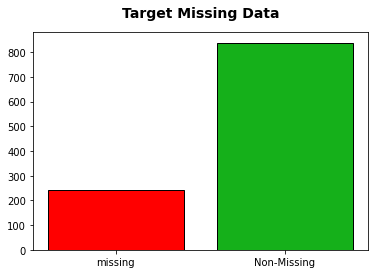

In [5]:
fig,ax=plt.subplots()
p=ax.bar(x,y,color=['#FF0000','#15B01A'], ec='black')
ax.set_title('Target Missing Data', fontsize=14, fontweight='bold',pad=15)
plt.show()

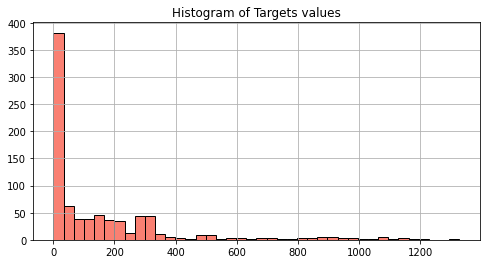

In [6]:
# Histogram of Target
df2.Targets.hist(bins=40,figsize=(8,4), color='#FA8072',ec='black')
plt.title('Histogram of Targets values')
plt.show()

In [14]:
# Dropping null value data from Smiles value
df3=df2[df2.Smiles.notnull()]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 1078
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        938 non-null    object 
 1   Name                             938 non-null    object 
 2   Synonyms                         938 non-null    object 
 3   Type                             938 non-null    object 
 4   Max Phase                        938 non-null    float64
 5   Molecular Weight                 938 non-null    float64
 6   Targets                          827 non-null    float64
 7   Bioactivities                    827 non-null    float64
 8   AlogP                            938 non-null    object 
 9   Polar Surface Area               938 non-null    object 
 10  HBA                              938 non-null    object 
 11  HBD                              938 non-null    object 
 12  #RO5 Violations      

In [15]:
df3.Targets.isnull().sum() 

111

In [16]:
# Impute zero for null values for Targets
df3['Targets']=df3['Targets'].fillna(0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df3.loc[df3.Targets==0,'Targets'] = 0
df3.loc[df3.Targets>0,'Targets'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [18]:
# Separate class
class_0 = df3[df3['Targets'] == 0]
class_1 = df3[df3['Targets'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (111, 31)
class 1: (827, 31)


In [20]:
# class count
class_count_1, class_count_0 = df3['Targets'].value_counts()

In [21]:
class_0_over = class_0.sample(class_count_1, replace=True)

In [22]:
class_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1078
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        827 non-null    object 
 1   Name                             827 non-null    object 
 2   Synonyms                         827 non-null    object 
 3   Type                             827 non-null    object 
 4   Max Phase                        827 non-null    float64
 5   Molecular Weight                 827 non-null    float64
 6   Targets                          827 non-null    float64
 7   Bioactivities                    827 non-null    float64
 8   AlogP                            827 non-null    object 
 9   Polar Surface Area               827 non-null    object 
 10  HBA                              827 non-null    object 
 11  HBD                              827 non-null    object 
 12  #RO5 Violations      

In [23]:
test_over = pd.concat([class_0_over, class_1], axis=0)

In [24]:
test_over.shape

(1654, 31)

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [25]:
test_over.groupby(['Targets']).count()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
Targets,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,827,827,827,827,827,827,0,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827
1.0,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827


In [26]:
df4 = pd.concat([test_over['Smiles'],test_over['ChEMBL ID']], axis=1 )
f=df4.to_csv('molecule20.smi', sep='\t', index=False, header=False)

In [29]:
y=test_over['Targets']

In [30]:
y.shape

(1654,)

In [35]:
!wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
!unzip fingerprints_xml.zip

--2021-11-07 21:14:47--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-11-07 21:14:48--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip.1’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-11-07 21:14:48 (24.2 MB/s) - ‘fingerprints_xml.zip.1’ saved [10871/10871]

Archive:  fingerprint

In [36]:
#listing and sorting the downloaded files
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [33]:
#Creating a list of present files
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [34]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [37]:
!pip install padelpy

     |████████████████████████████████| 20.9 MB 1.2 MB/s 


In [38]:
#Setting the fingerprint module
from padelpy import padeldescriptor
fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]
padeldescriptor(mol_dir='molecule20.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [39]:
descriptors = pd.read_csv(fingerprint_output_file)

In [40]:
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL4594417,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1
1,CHEMBL2103811,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1
2,CHEMBL2107816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,CHEMBL2107816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,CHEMBL2107816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,CHEMBL3623004,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
1650,CHEMBL99,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
1651,CHEMBL1200335,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
1652,CHEMBL820,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [41]:
descriptors.shape

(1654, 308)

In [42]:
X = descriptors.drop('Name', axis=1)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Columns: 307 entries, SubFP1 to SubFP307
dtypes: int64(307)
memory usage: 3.9 MB


In [44]:
# Removing all low-variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.95 * (1 - .95)))
X1 = selection.fit_transform(X)
X1.shape 


(1654, 49)

In [45]:
# Splitting data into traing and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
X_train.shape, y_train.shape 
X_test.shape, y_test.shape

((331, 49), (331,))

In [46]:
from sklearn.ensemble import RandomForestClassifier
n_est=range(200,1000,200)
for n in n_est: 
  rf = RandomForestClassifier(n_estimators =n, random_state = 42)
  # Train the model on training data
  rf.fit(X_train,y_train)
  accuracy_train=rf.score(X_train,y_train)
  print(accuracy_train)
  accuracy_test=rf.score(X_test,y_test)
  accuracy_test

0.9750566893424036
0.9750566893424036
0.9750566893424036
0.9750566893424036


In [47]:
accuracy_train=rf.score(X_train,y_train)

In [48]:
accuracy_train

0.9750566893424036

In [49]:
accuracy_test=rf.score(X_test,y_test)

In [50]:
accuracy_test

0.9516616314199395

In [51]:
y_pred=rf.predict(X_test)

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[156,   1],
       [ 15, 159]])

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred)) 
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.994
Recall: 0.914
F1 Score: 0.952


In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
print(mse) 
rmse=sqrt(mse)
print(rmse)

0.04833836858006042
0.2198598839717251


In [55]:
# Cross Validation for model performance
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X1,y, cv=10).mean() 

0.9516246805403432

In [56]:
# predict probabilities
lr_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [58]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.991


In [59]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

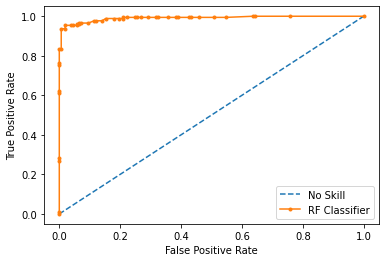

In [60]:
# plot the roc curve for the model
import matplotlib.pyplot as plt
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
